# TASK 5: CREDIT CARD FRAUD DETECTION

### Author: Lithikha B

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score

In [2]:
df = pd.read_csv(r"C:\Users\lithi\Desktop\2nd sem\DATA SCIENCE\CodSoft\Dataset\creditcard.csv")
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [4]:
df.shape

(284807, 31)

In [5]:
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [6]:
df['Class'].value_counts()

Class
0    284315
1       492
Name: count, dtype: int64

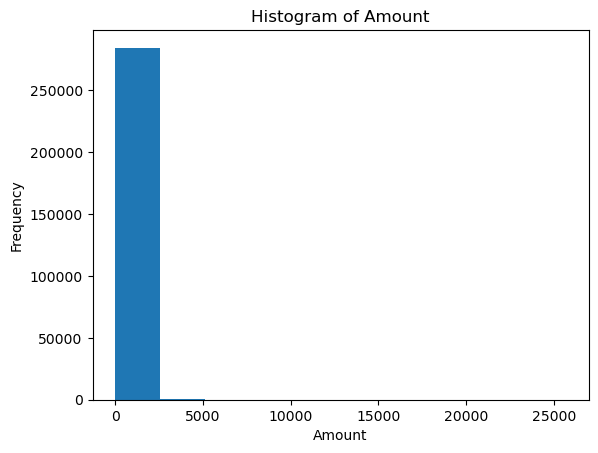

In [7]:
plt.hist(df['Amount'])
plt.xlabel('Amount')
plt.ylabel('Frequency')
plt.title('Histogram of Amount')
plt.show()

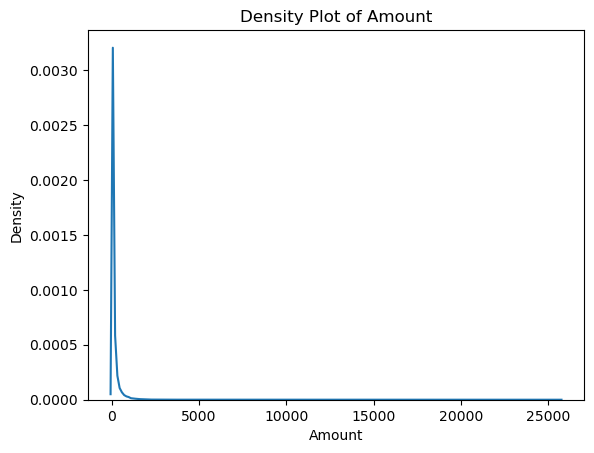

In [8]:
sns.kdeplot(df['Amount'])
plt.xlabel('Amount')
plt.ylabel('Density')
plt.title('Density Plot of Amount')
plt.show()

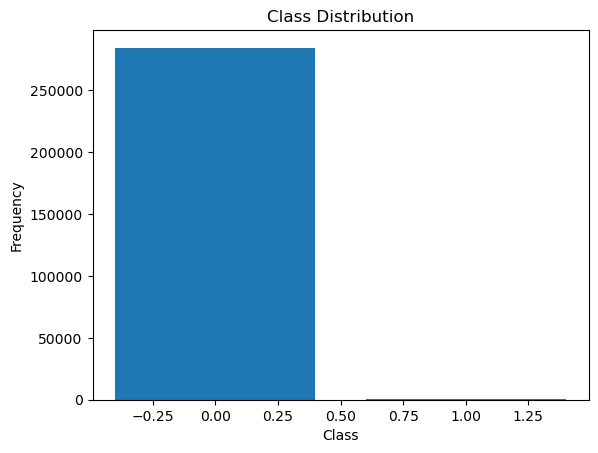

In [10]:
plt.bar(df['Class'].value_counts().index, df['Class'].value_counts().values)
plt.xlabel('Class')
plt.ylabel('Frequency')
plt.title('Class Distribution')
plt.show()

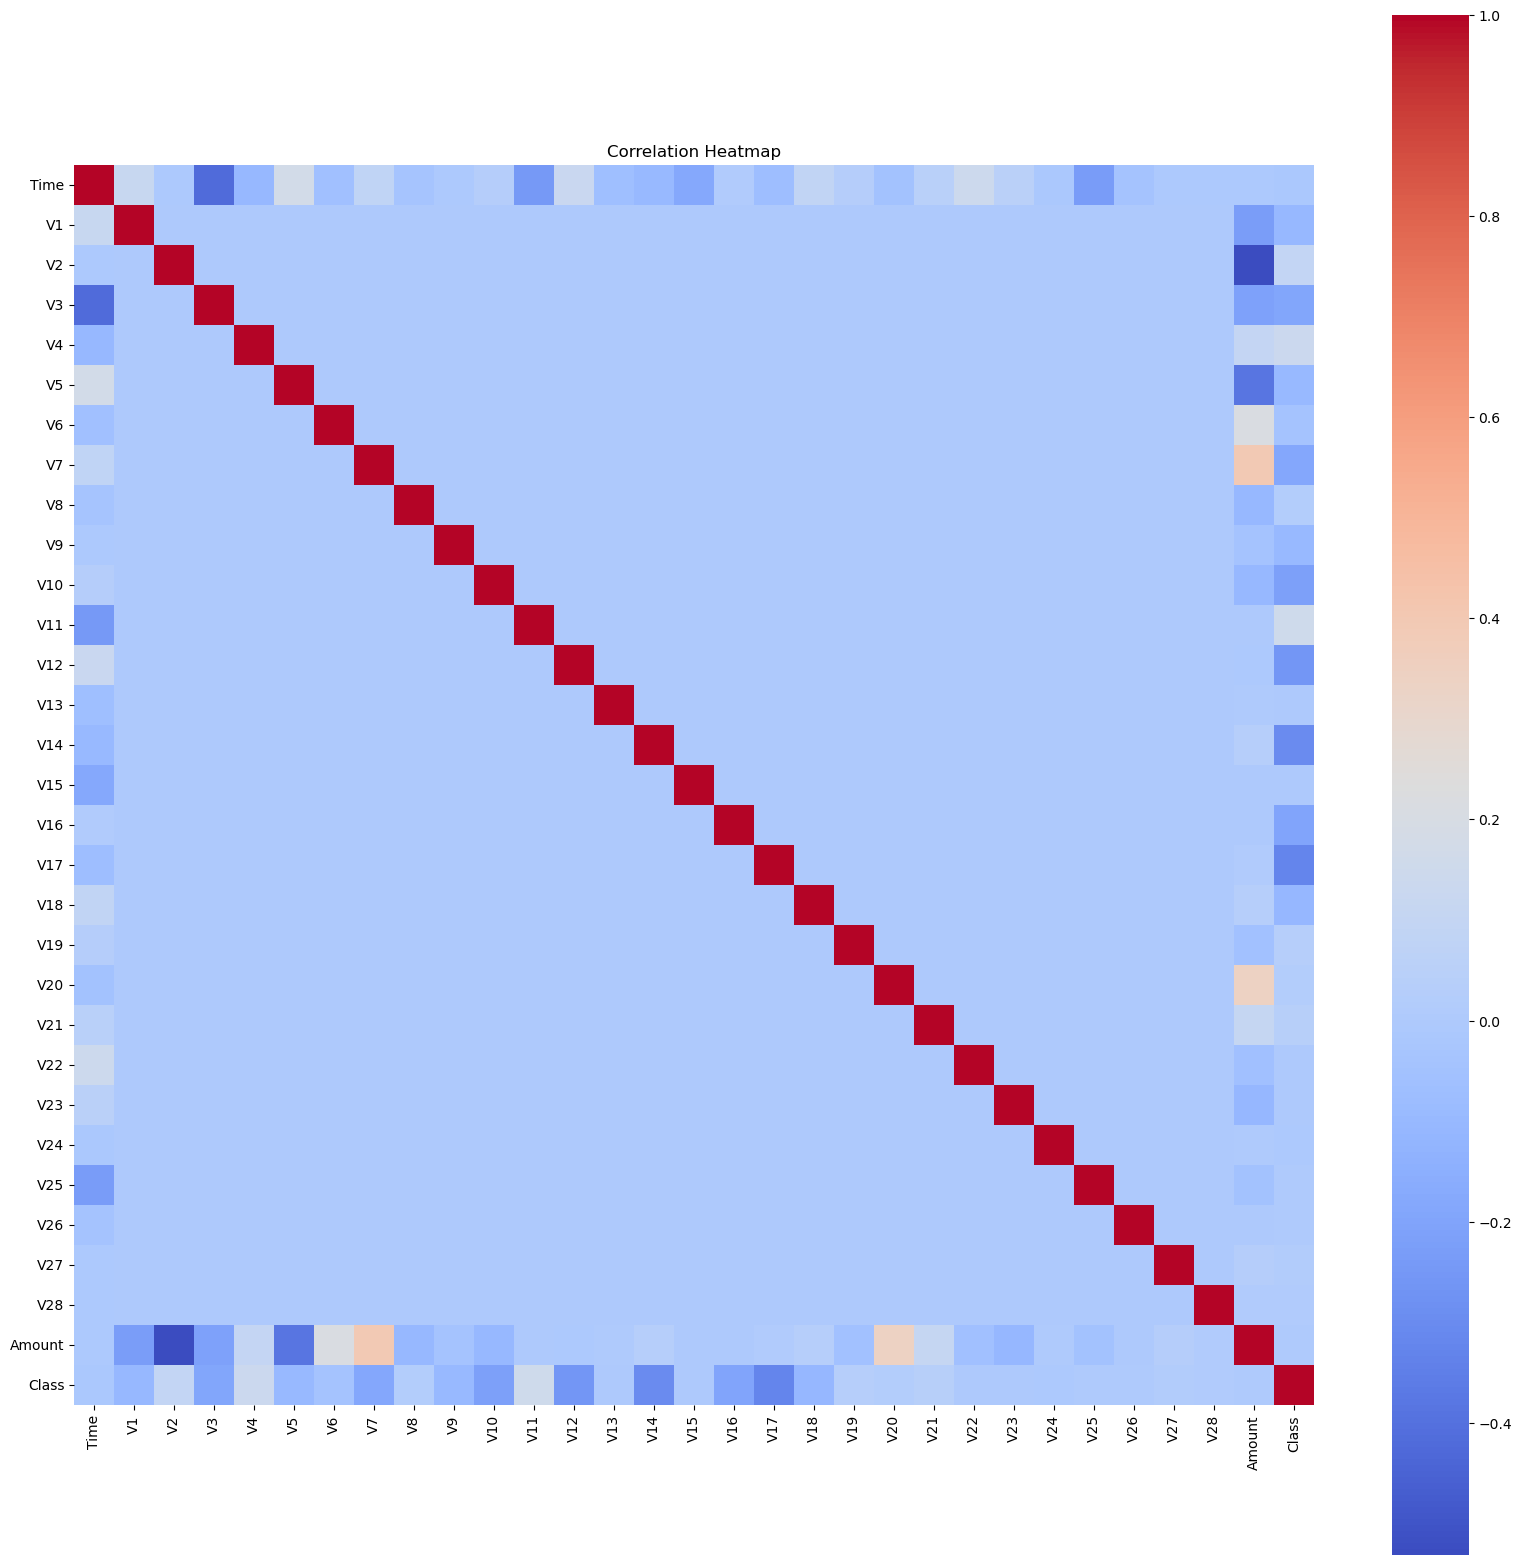

In [19]:
plt.figure(figsize=(20, 20))  
corr_matrix = df.corr()
sns.heatmap(corr_matrix, cmap='coolwarm', square=True)
plt.title('Correlation Heatmap')
plt.show()

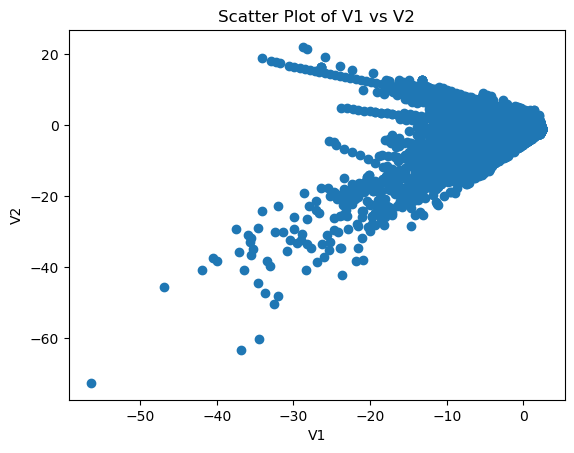

In [15]:
plt.scatter(df['V1'], df['V2'])
plt.xlabel('V1')
plt.ylabel('V2')
plt.title('Scatter Plot of V1 vs V2')
plt.show()

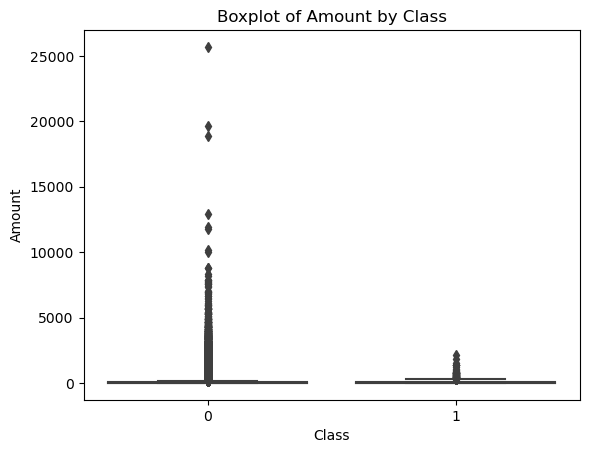

In [16]:
sns.boxplot(x='Class', y='Amount', data=df)
plt.title('Boxplot of Amount by Class')
plt.show()

## Standard Scaling

In [20]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df['Amount'] = scaler.fit_transform(pd.DataFrame(df['Amount']))

In [21]:
data = df.drop(['Time'], axis = 1)
data = data.drop_duplicates()

In [22]:
data['Class'].value_counts()

Class
0    275190
1       473
Name: count, dtype: int64

In [23]:
x = data.drop('Class', axis = 1)
y = data['Class']

In [24]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25)

In [25]:
model = LogisticRegression()
model.fit(x_train, y_train)
predict = model.predict(x_test)
print('Accuracy score: ', accuracy_score(predict, y_test))
print('Precision score', precision_score(predict, y_test))
print('Recall score: ', recall_score(predict, y_test))
print('f1 score', f1_score(predict, y_test))

Accuracy score:  0.9992019269835742
Precision score 0.5698924731182796
Recall score:  0.7794117647058824
f1 score 0.6583850931677019


The data is highly unbalanced

## Undersampling

In [26]:
clean = data[data.Class == 0]
fraud = data[data.Class == 1]
print(clean.shape)
print(fraud.shape)

(275190, 30)
(473, 30)


In [27]:
df.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,94838.202258,0.008258,-0.006271,0.012171,-0.007860,0.005453,0.002419,0.009637,-0.000987,0.004467,...,-0.000644,-0.001235,-0.000024,0.000070,0.000182,-0.000072,-0.000089,-0.000295,-0.000131,-0.000234
1,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,...,0.372319,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,0.135382


In [28]:
new_df = pd.concat([clean.sample(n = 473), fraud], axis = 0)

In [29]:
new_df

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
221811,2.328167,-1.516375,-1.139314,-1.909843,-0.845001,0.392549,-1.475195,0.126018,-1.132712,1.740233,...,-0.176565,-0.062050,0.170065,-0.337657,-0.178451,-0.163426,0.013358,-0.060373,-0.314848,0
30972,-1.760968,0.316130,2.531072,0.711357,-1.130730,1.201271,0.318715,0.490035,0.978229,-1.095936,...,-0.149604,0.107217,-0.457655,0.122076,0.423382,-0.424534,-0.239447,-0.374249,0.318569,0
12812,-2.013548,-1.457585,2.521197,2.087377,-1.331593,0.806103,0.878450,0.157512,1.666638,-1.401316,...,0.170564,-0.031683,1.007667,0.295026,0.527297,-0.235151,-0.079568,0.137325,1.643095,0
42539,-2.824595,2.376150,-0.597722,-1.253762,-1.713890,-1.275987,-1.068115,1.801211,-0.378923,-0.490852,...,0.199045,-0.107397,0.249088,0.556860,-0.199520,0.663386,-1.182920,-0.413020,-0.341555,0
224542,1.942475,-1.444346,0.136642,-0.507824,-1.700787,0.302857,-1.737127,0.400854,0.440890,1.020144,...,-0.082513,0.082518,0.348686,0.710270,-0.806910,0.559434,-0.006716,-0.027874,-0.114024,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
279863,-1.927883,1.125653,-4.518331,1.749293,-1.566487,-2.010494,-0.882850,0.697211,-2.064945,-5.587794,...,0.778584,-0.319189,0.639419,-0.294885,0.537503,0.788395,0.292680,0.147968,1.206024,1
280143,1.378559,1.289381,-5.004247,1.411850,0.442581,-1.326536,-1.413170,0.248525,-1.127396,-3.232153,...,0.370612,0.028234,-0.145640,-0.081049,0.521875,0.739467,0.389152,0.186637,-0.350191,1
280149,-0.676143,1.126366,-2.213700,0.468308,-1.120541,-0.003346,-2.234739,1.210158,-0.652250,-3.463891,...,0.751826,0.834108,0.190944,0.032070,-0.739695,0.471111,0.385107,0.194361,-0.041818,1
281144,-3.113832,0.585864,-5.399730,1.817092,-0.840618,-2.943548,-2.208002,1.058733,-1.632333,-5.245984,...,0.583276,-0.269209,-0.456108,-0.183659,-0.328168,0.606116,0.884876,-0.253700,0.626302,1


In [30]:
new_df['Class'].value_counts()

Class
0    473
1    473
Name: count, dtype: int64

In [31]:
x = new_df.drop(columns = 'Class', axis = 1)
y = new_df['Class']

In [32]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 42)

In [33]:
model = LogisticRegression()
model.fit(x_train, y_train)
predict = model.predict(x_test)
print('Accuracy score: ', accuracy_score(predict, y_test))
print('Precision score', precision_score(predict, y_test))
print('Recall score: ', recall_score(predict, y_test))
print('f1 score', f1_score(predict, y_test))

Accuracy score:  0.9367088607594937
Precision score 0.9180327868852459
Recall score:  0.9572649572649573
f1 score 0.9372384937238494


## Oversampling

In [34]:
x = data.drop(columns = 'Class', axis = 1)
y = data['Class']

In [35]:
from imblearn.over_sampling import SMOTE

In [36]:
new_x, new_y = SMOTE().fit_resample(x, y)

In [37]:
new_y.value_counts()

Class
0    275190
1    275190
Name: count, dtype: int64

In [38]:
x_train, x_test, y_train, y_test = train_test_split(new_x, new_y, test_size = 0.25, random_state = 42)

In [39]:
model = LogisticRegression()
model.fit(x_train, y_train)
predict = model.predict(x_test)
print('Accuracy score: ', accuracy_score(predict, y_test))
print('Precision score', precision_score(predict, y_test))
print('Recall score: ', recall_score(predict, y_test))
print('f1 score', f1_score(predict, y_test))

Accuracy score:  0.9465896289836113
Precision score 0.9183943473583205
Recall score:  0.9732532162391188
f1 score 0.9450283124013554
